In [1]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import hist
import scipy
from scipy import optimize

# Définir les répertoires de données et de sauvegarde
datadir = "/home/chardong/y_identification/Venv/save_pkl/df_test_sample_hard_scattering/"
savedir = "/home/chardong/y_identification/save_plots/"
# Charger les données
df = pd.read_pickle(datadir+"df_test_combined_sample_hard_scattering_skim30.pkl")

In [2]:
# Preselection on photon passing Loose cut-based selection 
df = df.query('y_IsLoose == 1')
# Adding column with absolute eta value, assuming symmetry
df['y_abs_eta'] = np.abs(df['y_eta'])

In [3]:
# Séparer le signal et le background
df_sig = df.query('truth_label == 1')
df_bkg = df.query('truth_label == 0')
# Sélection avec coupure tight
df_sig_tight = df_sig.query("y_IsTight == 1")
df_bkg_tight = df_bkg.query("y_IsTight == 1")

In [4]:
df.head()

,y_pt,y_eta,y_phi,y_convRadius,y_convType,weight,truth_label,evt_mu,y_IsLoose,y_IsTight,y_truth_pt,y_truth_eta,Original_background_score,Original_signal_score,Addevtmu_background_score,Addevtmu_signal_score,y_abs_eta
2,39.007401,0.172711,-0.628337,9999.0,0,554.386153,1.0,29.5,True,True,37.140778,0.202515,0.026289,0.973711,0.031017,0.968983,0.172711
3,86.679977,0.162386,2.113541,9999.0,0,40.708948,1.0,22.5,True,True,86.595421,0.162440,0.029999,0.970001,0.030308,0.969692,0.162386
4,281.008636,-0.796674,0.281347,9999.0,0,0.283104,1.0,28.5,True,True,282.742554,-0.796599,0.020765,0.979235,0.022537,0.977463,0.796674
6,59.986805,-1.329535,1.144537,9999.0,0,94.620789,1.0,42.5,True,False,58.435268,-1.346292,0.027042,0.972958,0.030241,0.969759,1.329535
7,401.259369,0.836519,-1.640876,9999.0,0,0.639481,1.0,54.5,True,True,399.329315,0.836874,0.019330,0.980670,0.022041,0.977959,0.836519


In [31]:
edges_eta= np.linspace(0, 2.45, 9)
axis_eta = hist.axis.Variable(edges_eta,  name="eta", label=r"$\eta$") # Bordures de l'histogramme pour la variable y_abs_eta.

In [32]:
# Nouvelles colonnes eta_bin dans le df assignant chaque valeur de y_abs_eta à un bin de l'histogramme axis_eta
df = df.assign(eta_bin=axis_eta.index(df['y_abs_eta']))

In [33]:
df_sig.head()

,y_pt,y_eta,y_phi,y_convRadius,y_convType,weight,truth_label,evt_mu,y_IsLoose,y_IsTight,y_truth_pt,y_truth_eta,Original_background_score,Original_signal_score,Addevtmu_background_score,Addevtmu_signal_score,y_abs_eta
2,39.007401,0.172711,-0.628337,9999.0,0,554.386153,1.0,29.5,True,True,37.140778,0.202515,0.026289,0.973711,0.031017,0.968983,0.172711
3,86.679977,0.162386,2.113541,9999.0,0,40.708948,1.0,22.5,True,True,86.595421,0.162440,0.029999,0.970001,0.030308,0.969692,0.162386
4,281.008636,-0.796674,0.281347,9999.0,0,0.283104,1.0,28.5,True,True,282.742554,-0.796599,0.020765,0.979235,0.022537,0.977463,0.796674
6,59.986805,-1.329535,1.144537,9999.0,0,94.620789,1.0,42.5,True,False,58.435268,-1.346292,0.027042,0.972958,0.030241,0.969759,1.329535
7,401.259369,0.836519,-1.640876,9999.0,0,0.639481,1.0,54.5,True,True,399.329315,0.836874,0.019330,0.980670,0.022041,0.977959,0.836519


In [34]:
print(len(df_sig['weight']))
print(len(df_sig['y_abs_eta']))
print(len(df_sig_tight['weight']))
print(len(df_sig_tight['y_abs_eta']))

2301038
2301038
2132650
2132650


In [35]:
def normalize_histogram(histogram):
    bin_widths = np.diff(histogram.axes[0].edges)   # Calcule la largeur de chaque bin.
    hist_values = histogram.values() / bin_widths   # Nombre par unité de mesure sur l'axe des x
    return hist_values, bin_widths 

In [38]:
len(edges_eta_sig[:])

17

In [39]:
len(den_eta_sig_norm)

17

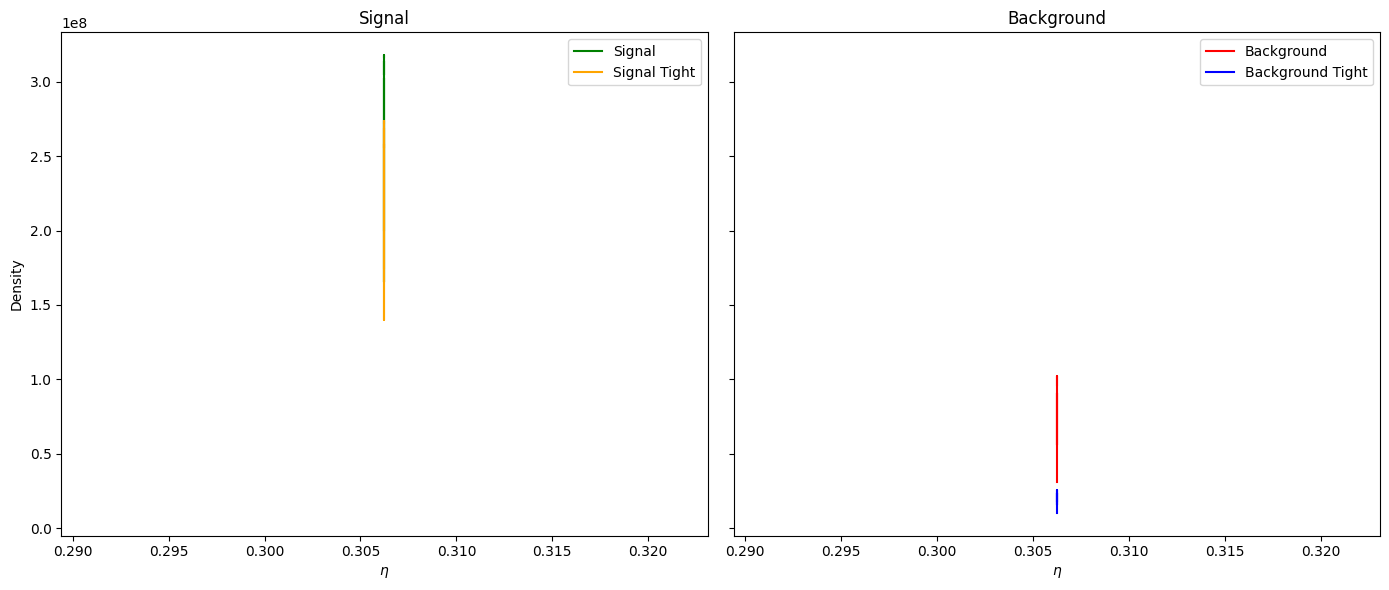

In [40]:

# Histograms and Axes pour `y_eta`
den_eta_sig = hist.Hist(axis_eta).fill(df_sig["y_abs_eta"], weight=df_sig["weight"])
den_eta_bkg = hist.Hist(axis_eta).fill(df_bkg["y_abs_eta"], weight=df_bkg["weight"])

num_eta_sig_tight = hist.Hist(axis_eta).fill(df_sig_tight["y_abs_eta"], weight=df_sig_tight["weight"])
num_eta_bkg_tight = hist.Hist(axis_eta).fill(df_bkg_tight["y_abs_eta"], weight=df_bkg_tight["weight"])

# Normaliser les histogrammes
den_eta_sig_norm, edges_eta_sig = normalize_histogram(den_eta_sig)
den_eta_bkg_norm, edges_eta_bkg = normalize_histogram(den_eta_bkg)
num_eta_sig_tight_norm, _ = normalize_histogram(num_eta_sig_tight)
num_eta_bkg_tight_norm, _ = normalize_histogram(num_eta_bkg_tight)

# Créer des sous-graphes pour le signal et le background
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot du signal
axs[0].step(edges_eta_sig[:-1], den_eta_sig_norm, where='post', label='Signal', color='green')
axs[0].step(edges_eta_sig[:-1], num_eta_sig_tight_norm, where='post', label='Signal Tight', color='orange')
axs[0].set_xlabel(r"$\eta$")
axs[0].set_ylabel("Density")
axs[0].legend()
axs[0].set_title('Signal')

# Plot du background
axs[1].step(edges_eta_bkg[:-1], den_eta_bkg_norm, where='post', label='Background', color='red')
axs[1].step(edges_eta_bkg[:-1], num_eta_bkg_tight_norm, where='post', label='Background Tight', color='blue')
axs[1].set_xlabel(r"$\eta$")
axs[1].legend()
axs[1].set_title('Background')

plt.tight_layout()
#plt.savefig("/home/chardong/y_identification/Venv/save_plots/variables_distrib_simple_plots/bkg+sig_ETA_distribution_sample_hard_scattering")
plt.show()

In [ ]:
# # MU_y

# Définir les bins pour mu de 0 à 80
edges_mu = [0., 4., 8., 12.,14., 16.,18., 20., 22., 24., 26., 28., 30., 32.,
               34., 36., 38., 40., 42., 44., 46., 48., 50., 52., 54., 55.,  56., 57.,  58., 59.,  60.,
               62., 63., 64., 65., 66., 68., 72., 76., 80., 100]

# Créer des axes de structure de bins pour mu
axis_mu = hist.axis.Variable(edges_mu, name="evt_mu", label=r"$\evt_mu$")

# Nouvelles colonnes mu_bin dans le df assignant chaque valeur de y_mu à un bin de l'histogramme axis_mu
df = df.assign(mu_bin=axis_mu.index(df['evt_mu']))

# Histograms and Axes pour `mu`
den_mu_sig = hist.Hist(axis_mu).fill(df_sig["evt_mu"], weight=df_sig["weight"])
den_mu_bkg = hist.Hist(axis_mu).fill(df_bkg["evt_mu"], weight=df_bkg["weight"])

num_mu_sig_tight = hist.Hist(axis_mu).fill(df_sig_tight["evt_mu"], weight=df_sig_tight["weight"])
num_mu_bkg_tight = hist.Hist(axis_mu).fill(df_bkg_tight["evt_mu"], weight=df_bkg_tight["weight"])

# Normaliser les histogrammes
den_mu_sig_norm, edges_mu_sig = normalize_histogram(den_mu_sig)
den_mu_bkg_norm, edges_mu_bkg = normalize_histogram(den_mu_bkg)
num_mu_sig_tight_norm, _ = normalize_histogram(num_mu_sig_tight)
num_mu_bkg_tight_norm, _ = normalize_histogram(num_mu_bkg_tight)

# Créer des sous-graphes pour le signal et le background
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot du signal
axs[0].step(edges_mu_sig[:-1], den_mu_sig_norm, where='post', label='Signal', color='green')
axs[0].step(edges_mu_sig[:-1], num_mu_sig_tight_norm, where='post', label='Signal Tight', color='orange')
axs[0].set_xlabel(r"$evt_mu$")
axs[0].set_ylabel("Density")
axs[0].legend()
axs[0].set_title('Signal')

# Plot du background
axs[1].step(edges_mu_bkg[:-1], den_mu_bkg_norm, where='post', label='Background', color='red')
axs[1].step(edges_mu_bkg[:-1], num_mu_bkg_tight_norm, where='post', label='Background Tight', color='blue')
axs[1].set_xlabel(r"$evt_mu$")
axs[1].legend()
axs[1].set_title('Background')

plt.tight_layout()
#plt.savefig("/home/chardong/y_identification/Venv/save_plots/variables_distrib_simple_plots/bkg+sig_MU_distribution_sample_hard_scattering")
plt.show()
